# 4. Training Classifier

In [5]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
#Try different classifier model
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:

# Dataframe
path_df = "Data/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "Data/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "Data/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "Data/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "Data/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [7]:
print(features_train.shape)
print(features_test.shape)

(1891, 300)
(334, 300)


In [8]:
models = {1:'Logistic Regression',
          2:'Multinomial Naive Bayes', 
          3:'K Nearest Neighbour', 
          4:'Support Vector Machines', 
          5:'Random Forest'}

## Cross-Validation for Hyperparameter Tuning

In [42]:
# Pilihan jenis classifier. Untuk selain nomor 1, maka perlu penyesuaian di bagian Random Search dan Grid Search.

choice = 2

if choice == 1:
    classifier = LogisticRegression(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==2:
    classifier = MultinomialNB()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    print(classifier)
elif choice==3:
    classifier =KNeighborsClassifier()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==4:
    classifier =svm.SVC(random_state=8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==5:
    classifier = RandomForestClassifier(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())

Parameters currently in use in Multinomial Naive Bayes:

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


### Randomized Search Cross Validation

Cari parameter yang secara random menggunakan cross validation.

In [12]:
if choice == 1:
    # Create the random grid logistic regression
    random_grid = {'C': [float(x) for x in np.linspace(start = 0.1, stop = 1.9, num = 10)],
               'multi_class': ['multinomial'],
               'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
               'class_weight': ['balanced', None],
               'penalty': ['l2']}
elif choice==2:
    pass
elif choice==3:
    pass
elif choice==4:
    # Create the random grid SVM
    random_grid = {'C': [.0001, .001, .01],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': [.0001, .001, .01, .1, 1, 10, 100],
                  'degree': [1, 2, 3, 4, 5],
                  'probability': [True]
                 }
elif choice==5:
    # Create the random grid Random Forest
    random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [20, 40, 60, 80, 100, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }
    
#pprint(random_grid)

In [10]:
# Definition of the random search
random_search = RandomizedSearchCV(estimator=classifier,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

NameError: name 'random_grid' is not defined

In [15]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:


AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

### Grid Search Cross Validation

Kemudian lanjutkan pencarian yang lebih detil terhadap daerah nilai terbaik hasil random search di atas.

In [83]:

# Create the parameter grid based on the results of random search 
param_grid = {'alpha':[float(x) for x in np.linspace(start = 0.0, stop = 1.0, num = 10)]}

# Create a base model
classifier = LogisticRegression(random_state=8)

In [88]:
# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=MultinomialNB(fit_prior=True, class_prior=None), 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
       error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0, 0.1111111111111111, 0.2222222222222222, 0.3333333333333333, 0.4444444444444444, 0.5555555555555556, 0.6666666666666666, 0.7777777777777777, 0.8888888888888888, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [89]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'alpha': 0.0}

The mean accuracy of a model with these hyperparameters is:
0.9498666666666666


In [90]:
best_classifier = grid_search.best_estimator_

best_classifier

MultinomialNB(alpha=0.0, class_prior=None, fit_prior=True)

### Model fit and performance

In [91]:
best_classifier.fit(features_train, labels_train)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


MultinomialNB(alpha=0.0, class_prior=None, fit_prior=True)

In [92]:
classifier_pred = best_classifier.predict(features_test)

In [93]:
d = {
     'Model': 'Logistic Regression',
     'Training Set Accuracy': accuracy_score(labels_train, best_classifier.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, classifier_pred)
}

df_models = pd.DataFrame(d, index=[0])
df_models

,Model,Training Set Accuracy,Test Set Accuracy
0,Logistic Regression,0.956108,0.928144


In [94]:
# Classification report
print("Classification report")
print(classification_report(labels_test,classifier_pred))

Classification report
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        81
           1       0.95      0.84      0.89        49
           2       0.97      0.90      0.94        72
           3       0.99      0.99      0.99        72
           4       0.86      0.92      0.89        60

   micro avg       0.93      0.93      0.93       334
   macro avg       0.93      0.92      0.92       334
weighted avg       0.93      0.93      0.93       334



### Confusion Matrix

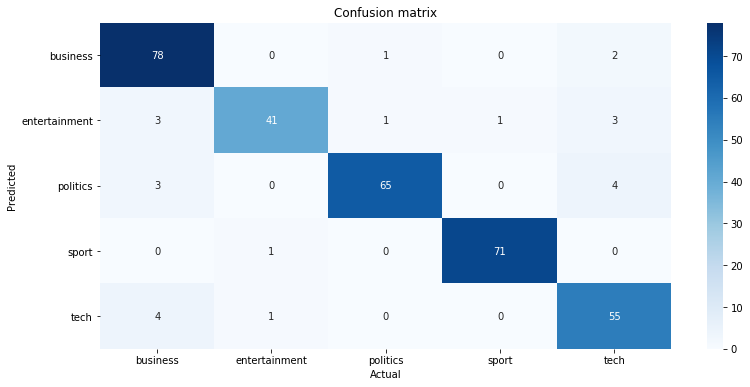

In [95]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, classifier_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

Bandingkan performansi dengan base model, yaitu model dengan parameter default.

In [96]:
base_model = LogisticRegression(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9431137724550899

In [97]:
best_classifier.fit(features_train, labels_train)
accuracy_score(labels_test, best_classifier.predict(features_test))

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


0.9281437125748503

# Latihan

1. Ubah format penyimpanan data ke CSV
2. Coba buatkan feature berikut (save dan upload feature), lalu laporkan pengaruhnya terhadap akurasi klasifikasi:
    a. Tanpa proses normalisation
    b. Tanpa proses lemmatisation
    c. Tanpa menghilangkan stopwords
3. Coba buat tfidf dengan nilai "max_features" yang berbeda-beda (lebih besar dan lebih kecil dari 300), lalu laporkan pengaruhnya terhadap akurasi klasifikasi.
4. Coba dengan beberapa algoritma klasifikasi yang berbeda (minimal 2 algoritma), carilah parameter terbaik (jelaskan nilai2 parameter yang telah dicoba untuk tiap jenis algoritma).
5. Jika anda ingin menggunakan teks bahasa Indonesia, bagian mana saja yang perlu dilakukan penyesuaian?
6. Opsional: Gunakan word embedding (e.g word2vec, GloVe).

# Jawaban

Jawaban ditulis dalam sebuah laporan singkat format pdf